載入套件

In [2]:
# Basic modules
import pandas as pd
import numpy as np

# 載入資料進行預處理需要使用的套件
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# 使用 sklearn 的 train_test_split() 進行資料分割
from sklearn.model_selection import train_test_split

# 使用 sklearn 的決策樹分類器對 training data 進行分類
from sklearn.tree import DecisionTreeClassifier

# 使用 sklearn 定義好的函式計算 accuracy、precision、recall、f1
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Data Visualization
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import tree

資料預處理-
載入CSV檔案，顯示前五筆資料

In [3]:
df = pd.read_csv("C:\\Users\\MITANY\\Desktop\\hour.csv")
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,if_average
0,1,2011/1/1,1,0,1,0,0,6,0,0,0.24,0.2879,0.81,0.0,3,13,16,0
1,2,2011/1/1,1,0,1,1,0,6,0,0,0.22,0.2727,0.80,0.0,8,32,40,0
2,3,2011/1/1,1,0,1,2,0,6,0,0,0.22,0.2727,0.80,0.0,5,27,32,0
3,4,2011/1/1,1,0,1,3,0,6,0,0,0.24,0.2879,0.75,0.0,3,10,13,0
4,5,2011/1/1,1,0,1,4,0,6,0,0,0.24,0.2879,0.75,0.0,0,1,1,0


資料預處理- 顯示每一行的資料數、平均數、標準差、最小值、百分位數值、最大值

In [4]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,if_average
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,0.343288,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,0.399045
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.474820,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,0.489716
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,0.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,0.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,0.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,1.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,1.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,1.000000


資料預處理- 檢查資料是否有缺失

In [5]:
print(df.count()==len(df))
#將每一行的資料數和 dataframe 的列數進行比較，檢查是否有缺失值
#皆為 True 代表比較的結果都一樣，資料沒有缺失

instant       True
dteday        True
season        True
yr            True
mnth          True
hr            True
holiday       True
weekday       True
workingday    True
weathersit    True
temp          True
atemp         True
hum           True
windspeed     True
casual        True
registered    True
cnt           True
if_average    True
dtype: bool


資料預處理- 重複資料處理

In [6]:
df_pre = df
df_duplicate = df_pre[df_pre.duplicated(keep="last")]
#假如有重複的column把最後一項標記為重複

In [7]:
print(df_duplicate)
#根據結果，由於 Index 內沒有值，資料沒有重複

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt, if_average]
Index: []


In [8]:
df_pre = df_pre.drop_duplicates()
#將被標記為重複的行去除

去掉和 if_average 相關性高的欄位

In [9]:
df_pre = df_pre.drop(columns = ['casual', 'registered', 'cnt'])

In [10]:
print("Before data-preprocessing: ", df.shape)
print("After data-preprocessing: ", df_pre.shape)
#資料處理前後差別 (由於dataframe沒有重複的 column，因此處理前處理後的 dataframe 大小都一樣)

Before data-preprocessing:  (17379, 18)
After data-preprocessing:  (17379, 15)


In [11]:
df_labelencoder = df_pre
#把要進行 Label encoding 的 dataframe 存入變數 df_labelencoder
df_onehotencoder = df_pre
#把要進行 One hot encoding 的 dataframe 存入變數 df_onehotencoder
df_pre.head()
#顯示處理後的 dataframe 前五筆資料

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,if_average
0,1,2011/1/1,1,0,1,0,0,6,0,0,0.24,0.2879,0.81,0.0,0
1,2,2011/1/1,1,0,1,1,0,6,0,0,0.22,0.2727,0.80,0.0,0
2,3,2011/1/1,1,0,1,2,0,6,0,0,0.22,0.2727,0.80,0.0,0
3,4,2011/1/1,1,0,1,3,0,6,0,0,0.24,0.2879,0.75,0.0,0
4,5,2011/1/1,1,0,1,4,0,6,0,0,0.24,0.2879,0.75,0.0,0


In [12]:
col_num = ["instant", "holiday", "workingday", "weathersit", "if_average", "if_re_aver"]
#需要的欄位值                    

In [13]:
col_cat = df_pre.columns.difference(col_num)
#去除 col_num 的欄位值存入 col_cat
col_cat

Index(['atemp', 'dteday', 'hr', 'hum', 'mnth', 'season', 'temp', 'weekday',
       'windspeed', 'yr'],
      dtype='object')

In [14]:
list(enumerate(col_num))
#透過 enumerate() 將 col_num 組合為索引序列

[(0, 'instant'),
 (1, 'holiday'),
 (2, 'workingday'),
 (3, 'weathersit'),
 (4, 'if_average'),
 (5, 'if_re_aver')]

資料預處理- Label encoding、 One hot encoding
https://medium.com/@PatHuang/%E5%88%9D%E5%AD%B8python%E6%89%8B%E8%A8%98-3-%E8%B3%87%E6%96%99%E5%89%8D%E8%99%95%E7%90%86-label-encoding-one-hot-encoding-85c983d63f87

Label encoding

In [15]:
# Use LabelEncoder to convert categorical variables to numerical ones
df_labelencoder[col_cat] = df_labelencoder[col_cat].apply(LabelEncoder().fit_transform)
#把 col_cat 裡的每個類別 mapping 到某個整數 (不會增加新欄位)
df_labelencoder.head(500)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,if_average
0,1,0,0,0,0,0,0,6,0,0,11,19,72,0,0
1,2,0,0,0,0,1,0,6,0,0,10,18,71,0,0
2,3,0,0,0,0,2,0,6,0,0,10,18,71,0,0
3,4,0,0,0,0,3,0,6,0,0,11,19,66,0,0
4,5,0,0,0,0,4,0,6,0,0,11,19,66,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,14,0,0,0,17,0,6,0,0,5,13,19,0,0
496,497,14,0,0,0,18,0,6,0,0,3,6,26,5,0
497,498,14,0,0,0,19,0,6,0,0,3,7,26,3,0
498,499,14,0,0,0,20,0,6,0,0,2,5,36,4,0


In [16]:
df_pre

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,if_average
0,1,0,0,0,0,0,0,6,0,0,11,19,72,0,0
1,2,0,0,0,0,1,0,6,0,0,10,18,71,0,0
2,3,0,0,0,0,2,0,6,0,0,10,18,71,0,0
3,4,0,0,0,0,3,0,6,0,0,11,19,66,0,0
4,5,0,0,0,0,4,0,6,0,0,11,19,66,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,481,0,1,11,19,0,1,1,1,12,17,51,4,0
17375,17376,481,0,1,11,20,0,1,1,1,12,17,51,4,0
17376,17377,481,0,1,11,21,0,1,1,0,12,17,51,4,0
17377,17378,481,0,1,11,22,0,1,1,0,12,18,47,3,0


In [17]:
print(df_pre['if_average'].unique())
#查看[]裡面的獨特值，EX:[1 2 3 4]等

[0 1]


One hot encoding

In [18]:
# Initialize a OneHotEncoder
ohe = OneHotEncoder(categories="auto")
#設定 One hot encoder 相關參數

# Convert "education" to sparse array
sarr_edu = ohe.fit_transform(df_pre[["weathersit"]]).toarray()
#將 df_pre dataframe 的 weathersit 欄位進行 One hot encoding 編碼，並移入至陣列

# One hot features
edu_features = pd.DataFrame(sarr_edu)
#將陣列轉換為 dataframe

edu_features.head(10)
#顯示 dataframe 的前 N 筆資料

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,0.0,1.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


In [19]:
print(type(sarr_edu))
print(sarr_edu)
print(type(edu_features))

<class 'numpy.ndarray'>
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
<class 'pandas.core.frame.DataFrame'>


In [20]:
ohe = OneHotEncoder(categories="auto")
#設定 One hot encoder 相關參數

sarr_edu0 = ohe.fit_transform(df_pre[["if_average"]]).toarray()
#將 df_pre dataframe 的 if_re_aver 欄位進行 One hot encoding 編碼，並移入至陣列

edu_features0 = pd.DataFrame(sarr_edu0)
#將陣列轉換為 dataframe

edu_features0.head(10)
#顯示 dataframe 的前 N 筆資料

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


In [21]:
df_pre

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,if_average
0,1,0,0,0,0,0,0,6,0,0,11,19,72,0,0
1,2,0,0,0,0,1,0,6,0,0,10,18,71,0,0
2,3,0,0,0,0,2,0,6,0,0,10,18,71,0,0
3,4,0,0,0,0,3,0,6,0,0,11,19,66,0,0
4,5,0,0,0,0,4,0,6,0,0,11,19,66,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,481,0,1,11,19,0,1,1,1,12,17,51,4,0
17375,17376,481,0,1,11,20,0,1,1,1,12,17,51,4,0
17376,17377,481,0,1,11,21,0,1,1,0,12,17,51,4,0
17377,17378,481,0,1,11,22,0,1,1,0,12,18,47,3,0


In [22]:
X = df_pre.loc[:, df_pre.columns != "if_average"]
#將 df_pre dataframe 的 weathersit 欄位去除存入變數 X

# This is target variable
#最後需要預估出的值
y = df_pre["if_average"]
print(X)
print(y)

       instant  dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0            1       0       0   0     0   0        0        6           0   
1            2       0       0   0     0   1        0        6           0   
2            3       0       0   0     0   2        0        6           0   
3            4       0       0   0     0   3        0        6           0   
4            5       0       0   0     0   4        0        6           0   
...        ...     ...     ...  ..   ...  ..      ...      ...         ...   
17374    17375     481       0   1    11  19        0        1           1   
17375    17376     481       0   1    11  20        0        1           1   
17376    17377     481       0   1    11  21        0        1           1   
17377    17378     481       0   1    11  22        0        1           1   
17378    17379     481       0   1    11  23        0        1           1   

       weathersit  temp  atemp  hum  windspeed  
0             

In [23]:
# You may split the dataset into any portion you want
# "test_size" is the "portion parameter" you can use
# Now, we just split them into 70%(traning) 30%(testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#將 X、y 分為 Training data （訓練資料）和 Test data （測試資料），訓練資料佔 0.7，測試資料佔 0.3。

# Check the result
len(X_train), len(X_test), len(y_train), len(y_test)
#檢查 X、y 的 Training data 和 Test data 的資料長度，可以看出比例為 7:3

(12165, 5214, 12165, 5214)

對 X_train 和 X_test 做 Normalization (可加可不加)

In [24]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(X_train)
print(X_test)

[[ 0.79816117  1.186623   -0.46189669 ...  0.65807235  0.54656366
  -0.03153707]
 [ 0.24866575  0.64712248 -1.36686903 ... -0.40101306  1.27640942
  -0.03153707]
 [-0.43561155 -1.47301994  1.34804798 ... -0.40101306  1.01575022
  -0.52213612]
 ...
 [-0.54866086 -0.14793093  0.44307565 ...  1.18761505 -0.39180945
   0.70436151]
 [-1.57647249 -1.04709847 -1.36686903 ... -1.46009847  1.79772781
  -0.52213612]
 [ 0.79018591  1.18189054 -0.46189669 ...  0.30504388 -0.33967761
  -0.52213612]]
[[ 0.05985147  0.02243766 -1.36686903 ... -1.81312694 -1.01739153
  -0.76743565]
 [-0.09147908 -1.27425658  1.34804798 ... -1.01881289  0.39016814
   0.70436151]
 [-1.66420035 -1.70491051 -1.36686903 ... -1.54835559 -0.60033681
   0.45906198]
 ...
 [-0.21230427 -1.39730056  1.34804798 ... -0.48927018 -0.02688657
  -0.2768366 ]
 [ 0.22095173  0.61399525 -1.36686903 ... -0.22449883 -0.96525969
  -0.2768366 ]
 [ 0.84720901  1.23868007  0.44307565 ...  1.27587217 -0.54820497
  -0.2768366 ]]


用 Training 資料建立的模型預測 X 測試資料的 y 類別 

第 9 行 = 第 13 行 + 第 17 行

In [25]:
# 建立處理 testing 資料的 function，可以直接將訓練模型、X訓練資料 和 y 訓練資料丟入
def evaluate_test(clf, X_train, X_test, y_train, y_test):
    #將 X 和 y 的訓練資料 fit 至訓練模型，主要用來做模型訓練
    clf.fit(X_train, y_train)
    
    #顯示模型 (決策樹) 的各項參數內容
    #以 f 開頭代表 {} 內的變數會被變數值替換
    print(f"Algorithm: {clf}" + "\n")
    print(f"Accuracy is: {round(clf.score(X_test, y_test), 2)}")
    #clf.score：透過訓練好的模型預測 X_test 的 y 類別，將 "預測 y 類別" 和 "實際 y 類別" 進行比較，所得結果為 Accuracy
    #round(N, 2)：4捨5入取 N 到小數點第二位
    
    y_pred = clf.predict(X_test)
    #利用模型預測 X 測試資料的 y 類別
 
    #使用 sklearn 定義好的函式計算 X_test 的 "預測 y 類別" 和 "實際 y 類別" 的 accuracy、precision、recall、f1
    accuracy = round(accuracy_score(y_test, y_pred), 2)
    precision = round(precision_score(y_test, y_pred), 2)
    recall = round(recall_score(y_test, y_pred), 2)
    f1 = round(f1_score(y_test, y_pred), 2)
    
    # Print out the result
    print(f"Precision is: {precision}")
    print(f"Recall is: {recall}")
    print(f"f1 is: {f1}")
    print(f"y_pred is: {y_pred}" + f"y_pred shape is: {y_pred.shape}")

    # Pass the reslut
    return np.array([accuracy, precision, recall, f1, y_pred])
    #將 accuracy、precision、recall、f1 的運算結果回傳

In [26]:
arr_eval_test = np.array([])
print(arr_eval_test)
# 建置一個空陣列 arr_eval_test

[]


In [214]:
# Import Decision tree from Sklearn
from sklearn.tree import DecisionTreeClassifier

# Initiate DecisionTreeClassifier() object
dtc = tree.DecisionTreeClassifier(criterion='gini',max_depth=3, max_leaf_nodes=5)
#建立訓練模型 (決策樹分類器)，可以修改樹深參數、節點數及其他設定

In [215]:
arr_eval_test = np.append(arr_eval_test, evaluate_test(dtc, X_train, X_test, y_train, y_test), axis=0)
#將 function 的運算結果存入陣列 arr_eval_test 內，存放的方向為 axis=0 (由上往下)

Algorithm: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Accuracy is: 0.81
Precision is: 0.73
Recall is: 0.82
f1 is: 0.78
y_pred is: [0 0 0 ... 0 1 0]y_pred shape is: (5214,)


用 Testing 資料建立的模型預測 X 訓練資料的 y 類別

第 9 行 = 第 13 行 + 第 17 行

In [216]:
# 建立處理 training 資料的 function，可以直接將訓練模型、X測試資料 和 y 測試資料丟入
def evaluate_train(clf, X_train, X_test, y_train, y_test):
    #將 X 和 y 的測試資料 fit 至訓練模型，主要用來做模型訓練
    clf.fit(X_test, y_test)

    #顯示模型 (決策樹) 的各項參數內容
    #以 f 開頭代表 {} 內的變數會被變數值替換
    print(f"Algorithm: {clf}" + "\n")
    print(f"Accuracy is: {round(clf.score(X_train, y_train), 2)}")
    #clf.score：透過訓練好的模型預測 X_train 的 y 類別，將 "預測 y 類別" 和 "實際 y 類別" 進行比較，所得結果為 Accuracy
    #round(N, 2)：4捨5入取 N 到小數點第二位
    
    y_pred = clf.predict(X_train)
    #利用模型預測 X 訓練資料的 y 類別

    #使用 sklearn 定義好的函式計算 X_train 的 "預測 y 類別" 和 "實際 y 類別" 的 accuracy、precision、recall、f1
    accuracy = round(accuracy_score(y_train, y_pred), 2)
    precision = round(precision_score(y_train, y_pred), 2)
    recall = round(recall_score(y_train, y_pred), 2)
    f1 = round(f1_score(y_train, y_pred), 2)
    
    # Print out the result
    print(f"Precision is: {precision}")
    print(f"Recall is: {recall}")
    print(f"f1 is: {f1}")
    print(f"y_pred is: {y_pred}" + f"y_pred shape is: {y_pred.shape}")

    # Pass the reslut
    return np.array([accuracy, precision, recall, f1])
    #將 accuracy、precision、recall、f1 的運算結果回傳

In [217]:
arr_eval_train = np.array([])
print(arr_eval_train)
# 建置一個空陣列 arr_eval_train

[]


In [218]:
# Import Decision tree from Sklearn
from sklearn.tree import DecisionTreeClassifier

# Initiate DecisionTreeClassifier() object
dtc = DecisionTreeClassifier(criterion='gini',max_depth=3, max_leaf_nodes=5)
#建立訓練模型 (決策樹分類器)，可以修改樹深參數、節點數及其他設定

In [219]:
arr_eval_train = np.append(arr_eval_train, evaluate_train(dtc, X_train, X_test, y_train, y_test), axis=0)
#將 function 的運算結果存入陣列 arr_eval_test 內，存放的方向為 axis=0 (由上往下)

Algorithm: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Accuracy is: 0.81
Precision is: 0.77
Recall is: 0.73
f1 is: 0.75
y_pred is: [1 0 0 ... 1 0 0]y_pred shape is: (12165,)


決策樹模型可視化
https://medium.com/starbugs/decision-tree-can-i-play-badminton-today-1a39cc03850b

將使用 Training 資料建立的決策樹模型進行可視化

In [220]:
dtc.fit(X_train, y_train)
#將 X 和 y 的訓練資料 fit 至訓練模型，主要用來做模型訓練

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [221]:
dtc.predict(X_test)
#利用模型預測 X 測試資料的 y 類別

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [222]:
from sklearn import tree
#從 sklearn 匯入 tree 模組

[Text(125.55000000000001, 190.26, 'X[5] <= -0.732\ngini = 0.481\nsamples = 12165\nvalue = [7275, 4890]'),
 Text(83.7, 135.9, 'gini = 0.008\nsamples = 3487\nvalue = [3473, 14]'),
 Text(167.4, 135.9, 'X[10] <= -0.672\ngini = 0.492\nsamples = 8678\nvalue = [3802, 4876]'),
 Text(83.7, 81.53999999999999, 'X[0] <= -0.444\ngini = 0.391\nsamples = 2449\nvalue = [1795, 654]'),
 Text(41.85, 27.180000000000007, 'gini = 0.137\nsamples = 916\nvalue = [848, 68]'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.472\nsamples = 1533\nvalue = [947, 586]'),
 Text(251.10000000000002, 81.53999999999999, 'X[5] <= 1.439\ngini = 0.437\nsamples = 6229\nvalue = [2007, 4222]'),
 Text(209.25, 27.180000000000007, 'gini = 0.387\nsamples = 5564\nvalue = [1457, 4107]'),
 Text(292.95, 27.180000000000007, 'gini = 0.286\nsamples = 665\nvalue = [550, 115]')]

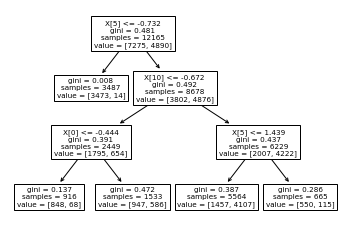

In [223]:
tree.plot_tree(dtc)
#將決策樹模型進行可視化

將使用 Testing 資料建立的決策樹模型進行可視化

In [224]:
dtc.fit(X_test, y_test)
#將 X 和 y 的測試資料 fit 至訓練模型，主要用來做模型訓練

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [225]:
dtc.predict(X_train)
#利用模型預測 X 訓練資料的 y 類別

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

[Text(125.55000000000001, 190.26, 'X[5] <= -0.732\ngini = 0.477\nsamples = 5214\nvalue = [3169, 2045]'),
 Text(83.7, 135.9, 'gini = 0.009\nsamples = 1514\nvalue = [1507, 7]'),
 Text(167.4, 135.9, 'X[10] <= -0.256\ngini = 0.495\nsamples = 3700\nvalue = [1662, 2038]'),
 Text(83.7, 81.53999999999999, 'X[0] <= -0.431\ngini = 0.439\nsamples = 1516\nvalue = [1022, 494]'),
 Text(41.85, 27.180000000000007, 'gini = 0.168\nsamples = 498\nvalue = [452, 46]'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.493\nsamples = 1018\nvalue = [570, 448]'),
 Text(251.10000000000002, 81.53999999999999, 'X[5] <= 1.439\ngini = 0.414\nsamples = 2184\nvalue = [640, 1544]'),
 Text(209.25, 27.180000000000007, 'gini = 0.35\nsamples = 1932\nvalue = [437, 1495]'),
 Text(292.95, 27.180000000000007, 'gini = 0.313\nsamples = 252\nvalue = [203, 49]')]

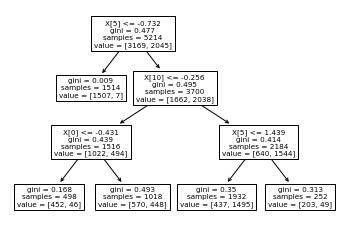

In [226]:
tree.plot_tree(dtc)
#將決策樹模型進行可視化

In [227]:
classifier = tree.DecisionTreeClassifier()
classifier = classifier.fit(X, y)
#tree.plot_tree(classifier)

In [228]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree

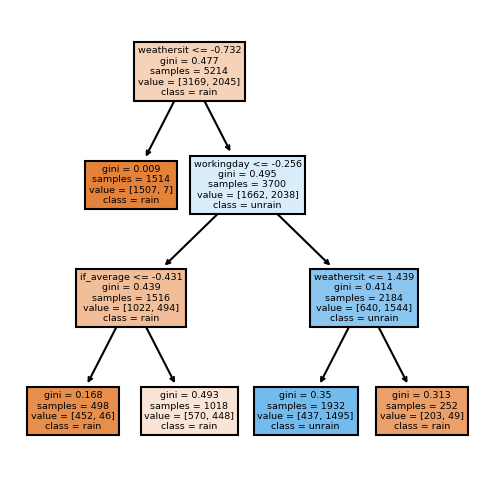

In [235]:
fn=["if_average","windspeed","yr","if_average","weekday","weathersit","holiday","casual","registered","cnt","workingday"]
cn=["rain","unrain"]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=150)
tree.plot_tree(dtc,
               feature_names = fn, 
               class_names=cn,
               filled = True);